# Delaunay-Watershed for data compression : Cell aggregates

In this notebook, we present how to compress label data in polygonal lines and recompute the mask from the polygonal lines and the seeds if necessary

## 1) Compute polygonal lines with Delaunay Watershed

Number of Nodes : 1040  Number of Edges : 1462


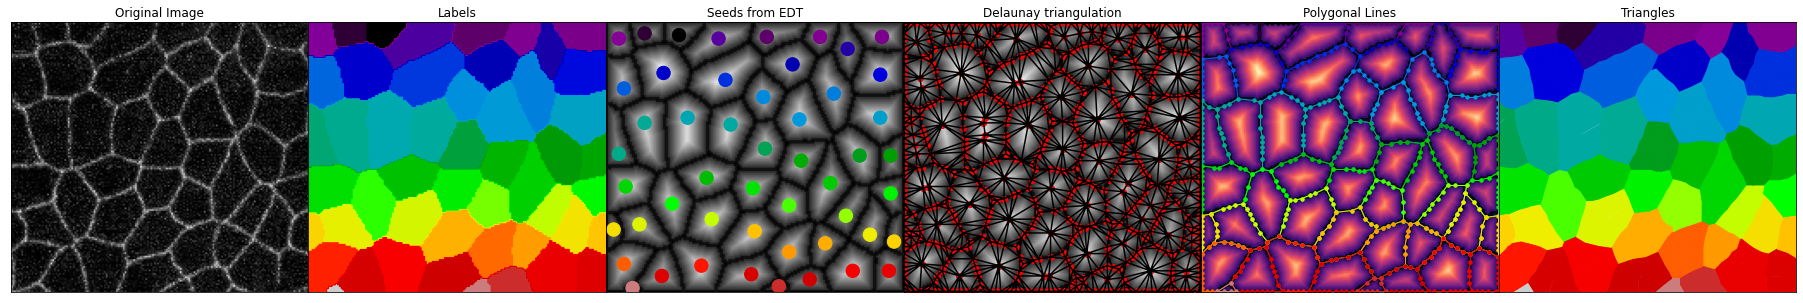

In [1]:
import skimage.io as io 
import numpy as np 
import matplotlib.pyplot as plt
from delaunay_watershed_2d import geometry_reconstruction_2d
def make_idx(n): 
    return(("000"+str(n))[-3:])

img = io.imread("Net_images/BW_images/CellCells_2.tif")
lbl = io.imread("Net_images/Masks/mask_Cells_2.tif")

DW = geometry_reconstruction_2d(lbl,expansion_labels=6, min_dist=3,original_image=img)
DW.extended_plot()

## 2) Export segmentations for reconstruction

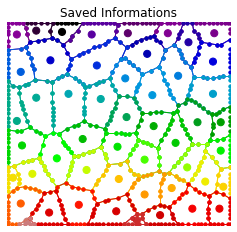

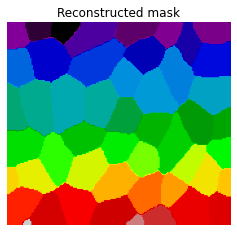

In [4]:
from delaunay_watershed_2d import reconstruct_mask_from_dict
import matplotlib.pyplot as plt
DW.plot_polylines_and_seeds()
DW.export_segmentation("Dict_mask.npy")
labels = reconstruct_mask_from_dict("Dict_mask.npy",plot = True)


In [5]:
import sys
import numpy as np 
D = np.load("Dict_mask.npy",allow_pickle=True).item()
Dict_memory_footprint = D['Verts'].nbytes + D['Edges'].nbytes + D['seeds'].nbytes + D['image_shape'].nbytes
print("Size of Delaunay-Watershed data:",Dict_memory_footprint,"bytes")
print("Size of the labels:",labels.nbytes,"bytes")
print("Relative size:", Dict_memory_footprint/labels.nbytes)

Size of Delaunay-Watershed data: 29808 bytes
Size of the labels: 108644 bytes
Relative size: 0.2743639777622326
